#  Modern Dimensionality Reduction
## Data Science (masters)
## Math 5364 & 5366, Fall 20 & Spring 21
## Tarleton State University
## Dr. Scott Cook
## March 17th, 2021


## Dimensionailty Reduction and the Curse of Dimensionality

Dimensionality reduction techinques are methods of reducting the number of features in a datasets while maintaining some types of structure in the data. 
The analysis of high dimensional data can be difficult due to its high computation time and its higher chance of overfitting. This issue has been described as the curse of dimensionality. Dimensionality reduction has been used to address these issues. Below are some of the many algorithms used for dimensionality reduction. 


In [ ]:
! pip install --upgrade numpy
! pip install --upgrade pandas

     |████████████████████████████████| 15.3MB 305kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


     |████████████████████████████████| 9.9MB 4.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
import numpy as np
import pandas as pd
import requests
import io
from copy import deepcopy  
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import Lasso

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Find the BrownsvilleData_SciHub.csv file in the Files menu on the left
# Right click the file and click Copy Path
# Paste the path between the quotation marks below
path = "/content/drive/MyDrive/Data_ScienceS21_Projects/UrbanLandCover_training.csv"
df = pd.read_csv(path)


### Dataset
The data set used for this project is called the Urban Land Cover Data Set andwas taken from the UCI Machine Learning Repository. 
*   classifies the land cover based on physical and environmental variables
*   has 168 observations
*   has 147 features 

The land cover classes (target variable) are: trees, grass, soil, concrete, asphalt, buildings, cars, pools, shadows. 

In [ ]:
df.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,20.40,18.69,2.19,0.48,0.87,6.23,1.60,0.74,-0.08,56,4219.69,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,...,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,6.97,7.02,1.52,0.45,0.63,6.35,1.55,0.69,-0.10,156,3682.08,3.01,1188,1.45,209.44,2.25,3.54,181.91,222.46,223.95,9.82,10.37,10.51,2.97,0.63,0.65,7.16,1.43,0.83,...,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14,4.57,7711,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,4.93,5.53,1.14,0.52,0.78,6.19,1.88,0.19,-0.08,144,2943.35,2.32,1095,1.50,232.50,1.93,2.55,208.36,244.07,245.08,6.55,7.01,6.83,2.19,0.49,0.74,6.51,1.61,0.81,...,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04,1.93,4606,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,5.56,5.46,2.51,0.50,0.74,6.28,1.51,0.83,-0.09,218,3550.19,3.16,4009,2.28,231.57,3.48,3.47,204.77,245.17,244.76,9.55,9.35,9.34,2.27,0.63,0.62,7.04,1.32,0.84,...,1.41,226.65,2.06,2.88,200.18,239.93,239.83,13.69,13.75,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38,2.41,10482,1.41,226.65,2.06,2.88,200.18,239.93,239.83,13.69,13.75,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,8.90,9.77,12.26,0.71,0.59,7.36,0.63,0.99,-0.11,504,2300.41,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,8.90,9.77,12.26,0.71,0.59,7.36,0.63,0.99,...,2.37,193.39,5.03,12.06,172.13,203.14,204.91,17.38,14.93,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38,3.34,16680,2.37,193.39,5.03,12.06,172.13,203.14,204.91,17.38,14.93,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [ ]:
df.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.008512,565.869048,1.132976,165.569821,2.077679,2.229881,161.577083,163.672440,171.459226,10.131369,9.350417,9.306548,2.214583,0.541607,0.747619,6.473690,1.649940,0.583631,-0.003095,188.107143,3064.534821,2.232440,1255.785714,1.273690,163.728095,2.149464,2.515595,160.345595,161.705595,169.132619,14.262738,13.314583,13.198690,2.576071,0.647083,0.729762,6.980179,1.635000,0.630238,0.001548,...,1.561190,159.036488,2.665595,3.31500,158.102083,156.078036,162.928631,24.870179,24.305238,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917,2.929048,5300.851190,1.561190,159.036488,2.665595,3.31500,158.102083,156.078036,162.928631,24.870179,24.305238,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917
std,0.634807,679.852886,0.489150,61.883993,0.699600,0.703572,63.407201,71.306748,67.973969,5.179409,4.998495,4.964323,1.761846,0.140347,0.131054,0.431923,0.322476,0.243324,0.183303,108.425478,940.010168,0.778856,1284.983772,0.550616,61.331050,0.823835,0.913878,61.770770,70.618303,67.203382,8.293998,7.887084,7.957123,2.588530,0.144580,0.139559,0.471097,0.381054,0.232865,0.178097,...,0.793973,56.900695,1.615194,1.69142,56.134006,64.888765,61.719320,13.797547,12.825111,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611,1.386688,5233.645588,0.793973,56.900695,1.615194,1.69142,56.134006,64.888765,61.719320,13.797547,12.825111,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611
min,1.000000,10.000000,0.020000,37.670000,1.000000,1.060000,30.680000,32.210000,40.120000,4.330000,3.220000,2.720000,1.000000,0.090000,0.220000,4.340000,0.620000,0.020000,-0.360000,14.000000,1225.780000,1.000000,32.000000,0.020000,40.910000,1.000000,1.060000,33.730000,33.340000,42.470000,6.040000,3.430000,3.430000,1.000000,0.090000,0.160000,5.380000,0.400000,0.060000,-0.340000,...,0.160000,42.630000,1.050000,1.10000,37.660000,35.360000,43.940000,6.450000,4.050000,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000,1.000000,97.000000,0.160000,42.630000,1.050000,1.10000,37.660000,35.360000,43.940000,6.450000,4.050000,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000
25%,1.537500,178.000000,0.787500,133.977500,1.547500,1.700000,9

In [ ]:
#Splitting the datset into modeling and holdout sets
X = df.drop(columns=['class'])
y = df['class']

holdout_frac = 0.20
holdout_splitter = ShuffleSplit(n_splits=5, test_size=holdout_frac, random_state=42)
model_idx, holdout_idx = next(holdout_splitter.split(X, y))
X_m, y_m = X.iloc[model_idx]  , y.iloc[model_idx]
X_h, y_h = X.iloc[holdout_idx], y.iloc[holdout_idx]
print(X_m)

     BrdIndx  Area  Round  ...  NDVI_140  BordLngth_140  GLCM3_140
69      3.46   310   2.09  ...     -0.01           2602    1628.84
136     1.83   356   0.87  ...      0.03           1496     755.80
2       2.12   266   1.47  ...     -0.07            566    1094.04
93      2.44   397   1.27  ...     -0.08           1490    1274.22
134     2.22   116   1.29  ...     -0.02           1156    1087.71
..       ...   ...    ...  ...       ...            ...        ...
71      1.38  1482   0.54  ...     -0.12            238    2345.76
106     2.71   532   1.41  ...      0.14           1166    1278.47
14      2.03   249   1.00  ...     -0.04            314    1105.52
92      3.20   461   1.19  ...     -0.07           2084    1225.65
102     2.12   590   0.80  ...      0.28           1084     804.86

[134 rows x 147 columns]


# Statistics-based Dimensionality Reduction

## Variance Threshold



> Variance Threshold drops all features where the variance along the column does not exceed the variance threshold.


Notable Hyperparameters
*   Variance Threshold

NOTE: Effective use of variance threshold is applied to *scaled* data (i.e. normalized)

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

Further background can be found at https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2



In [ ]:
idx = VarianceThreshold(threshold=2).fit(X_m).get_support()
pd.DataFrame(data = VarianceThreshold(threshold=2).fit_transform(X_m), 
             columns=X_m.columns[idx])

,Area,Bright,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,BordLngth,GLCM3,Area_40,Bright_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,BordLngth_40,GLCM3_40,Area_60,Bright_60,Mean_G_60,Mean_R_60,Mean_NIR_60,SD_G_60,SD_R_60,SD_NIR_60,LW_60,BordLngth_60,GLCM3_60,Area_80,Bright_80,Mean_G_80,Mean_R_80,Mean_NIR_80,SD_G_80,SD_R_80,...,Bright_100,Compact_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,SD_G_100,SD_R_100,SD_NIR_100,LW_100,BordLngth_100,GLCM3_100,BrdIndx_120,Area_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,BordLngth_140,GLCM3_140
0,310.0,199.07,190.24,204.37,202.61,10.85,10.71,11.52,1.06,256.0,3074.54,898.0,193.29,186.82,197.54,195.53,13.49,15.54,16.44,1.06,428.0,2097.86,2510.0,203.11,195.83,207.51,205.98,14.85,17.56,18.42,2.14,720.0,1646.27,2510.0,203.11,195.83,207.51,205.98,14.85,17.56,...,199.06,2.81,5.11,194.82,201.91,200.44,15.65,19.63,20.03,1.78,1588.0,1513.74,6.41,9605.0,195.24,4.66,6.64,192.52,197.27,195.92,15.94,20.21,20.47,1.61,2602.0,1628.84,6.41,9605.0,195.24,4.66,6.64,192.52,197.27,195.92,15.94,20.21,20.47,1.61,2602.0,1628.84
1,356.0,37.67,30.68,37.66,44.68,6.78,6.95,7.10,2.05,154.0,3448.69,976.0,43.67,40.81,41.72,48.47,13.99,11.98,11.83,2.39,374.0,1696.13,976.0,43.67,40.81,41.72,48.47,13.99,11.98,11.83,2.39,374.0,1696.13,976.0,43.67,40.81,41.72,48.47,13.99,11.98,...,62.21,2.70,4.17,60.51,59.40,66.71,31.70,25.53,25.56,1.67,1330.0,805.38,4.13,7786.0,67.17,2.77,4.24,67.63,63.52,70.36,36.20,29.67,29.08,1.45,1496.0,755.80,4.13,7786.0,67.17,2.77,4.24,67.63,63.52,70.36,36.20,29.67,29.08,1.45,1496.0,755.80
2,266.0,232.18,206.54,244.22,245.79,6.16,4.93,5.53,1.14,144.0,2943.35,1095.0,232.50,208.36,244.07,245.08,6.55,7.01,6.83,2.19,338.0,3087.91,4368.0,224.42,202.85,234.48,235.94,13.07,13.26,12.99,2.19,586.0,1245.19,4368.0,224.42,202.85,234.48,235.94,13.07,13.26,...,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,566.0,1094.04,1.93,4606.0,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,566.0,1094.04,1.93,4606.0,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,566.0,1094.04
3,397.0,237.52,220.59,248.17,243.78,5.57,5.03,6.30,1.06,200.0,2466.27,1855.0,237.91,217.21,249.24,247.28,7.98,5.77,6.85,2.77,528.0,1581.24,1855.0,237.91,217.21,249.24,247.28,7.98,5.77,6.85,2.77,528.0,1581.24,2151.0,236.25,216.33,247.02,245.40,11.89,11.43,...,237.64,3.64,4.21,214.51,249.67,248.73,8.44,7.44,7.52,1.71,1490.0,1274.22,4.05,7846.0,237.64,3.64,4.21,214.51,249.67,248.73,8.44,7.44,7.52,1.71,1490.0,1274.22,4.05,7846.0,237.64,3.64,4.21,214.51,249.67,248.73,8.44,7.44,7.52,1.71,1490.0,1274.22
4,116.0,100.77,87.45,105.32,109.53,7.18,7.24,7.69,1.40,102.0,3160.26,1254.0,89.63,76.44,93.88,98.56,14.41,14.81,14.53,1.77,518.0,2089.26,1418.0,93.11,79.94,97.45,101.93,17.63,17.66,17.12,1.28,472.0,1581.57,2051.0,84.81,74.21,87.67,92.53,21.39,24.10,...,87.72,5.91,5.29,83.21,86.97,92.98,33.30,28.28,28.19,1.07,1156.0,1087.71,5.25,2982.0,87.72,5.91,5.29,83.21,86.97,92.98,33.30,28.28,28.19,1.07,1156.0,1087.71,5.25,2982.0,87.72,5.91,5.29,83.21,86.97,92.98,33.30,28.28,28.19,1.07,1156.0,1087.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1482.0,145.95,122.53,156.16,159.16,7.80,7.00,7.13,1.38,218.0,2596.20,1514.0,145.98,122.62,156.17,159.14,8.87,8.29,8.45,1.20,238.0,2345.76,1514.0,145.98,122.62,156.17,159.14,8.87,8.29,8.45,1.20,238.0,2345.76,1514.0,145.98,122.62,156.17,159.14,8.87,8.29,...,145.98,1.61,1.53,122.62,156.17,159.14,8.87,8.29,8.45,1.20,238.0,2345.76,1.51,1514.0,145.98,1.61,1.53,122.62,156.17,159.14,

## Univariate Selection



> Univariate Selection uses statistical tests to select features, specifically between the feature and the target variable.

Notable Algorithms
1.   SelectKBest
2.   SelectPercentile



Notable Hyperparameters
*   Scoring Function
*   the k top scores/top percentile

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest and https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

Further background can be found at https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2 and https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d

In [ ]:
idx = SelectKBest(score_func=f_classif, k=20).fit(X_m, y_m).get_support()
pd.DataFrame(data = SelectKBest(score_func=f_classif, k=20).fit_transform(X_m, y_m), 
             columns=X_m.columns[idx])

,Bright,Mean_G,Mean_R,Mean_NIR,NDVI,Bright_40,Mean_G_40,Mean_R_40,Mean_NIR_40,NDVI_40,Bright_60,Mean_G_60,Mean_R_60,Mean_NIR_60,NDVI_60,Bright_80,Mean_G_80,Mean_NIR_80,NDVI_80,Mean_G_100
0,199.07,190.24,204.37,202.61,-0.04,193.29,186.82,197.54,195.53,-0.03,203.11,195.83,207.51,205.98,-0.03,203.11,195.83,205.98,-0.03,194.82
1,37.67,30.68,37.66,44.68,-0.10,43.67,40.81,41.72,48.47,-0.01,43.67,40.81,41.72,48.47,-0.01,43.67,40.81,48.47,-0.01,60.51
2,232.18,206.54,244.22,245.79,-0.08,232.50,208.36,244.07,245.08,-0.08,224.42,202.85,234.48,235.94,-0.07,224.42,202.85,235.94,-0.07,201.51
3,237.52,220.59,248.17,243.78,-0.06,237.91,217.21,249.24,247.28,-0.07,237.91,217.21,249.24,247.28,-0.07,236.25,216.33,245.40,-0.07,214.51
4,100.77,87.45,105.32,109.53,-0.09,89.63,76.44,93.88,98.56,-0.10,93.11,79.94,97.45,101.93,-0.10,84.81,74.21,92.53,-0.08,83.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,145.95,122.53,156.16,159.16,-0.12,145.98,122.62,156.17,159.14,-0.12,145.98,122.62,156.17,159.14,-0.12,145.98,122.62,159.14,-0.12,122.62
130,139.19,161.88,126.94,128.76,0.12,136.07,158.68,123.65,125.88,0.12,132.66,158.36,117.89,121.72,0.15,143.48,169.13,132.66,0.14,169.13
131,39.62,35.86,38.92,44.07,-0.04,49.62,42.95,50.15,55.76,-0.08,54.77,50.24,54.06,60.02,-0.04,54.77,50.24,60.02,-0.04,50.24
132,222.09,197.48,233.49,235.28,-0.08,220.12,196.04,231.42,232.89,-0.08,228.50,205.50,239.22,240.79,-0.08,228.42,205.42,240.70,-0.08,206.85


In [ ]:
idx = SelectPercentile(score_func=f_classif, percentile=10).fit(X_m,y_m).get_support()
pd.DataFrame(data = SelectPercentile(score_func=f_classif, percentile=10).fit_transform(X_m, y_m), 
             columns=X_m.columns[idx])

,Bright,Mean_G,Mean_R,Mean_NIR,NDVI,Bright_40,Mean_G_40,Mean_NIR_40,NDVI_40,Bright_60,Mean_G_60,NDVI_60,Mean_G_80,NDVI_80,Mean_G_100
0,199.07,190.24,204.37,202.61,-0.04,193.29,186.82,195.53,-0.03,203.11,195.83,-0.03,195.83,-0.03,194.82
1,37.67,30.68,37.66,44.68,-0.10,43.67,40.81,48.47,-0.01,43.67,40.81,-0.01,40.81,-0.01,60.51
2,232.18,206.54,244.22,245.79,-0.08,232.50,208.36,245.08,-0.08,224.42,202.85,-0.07,202.85,-0.07,201.51
3,237.52,220.59,248.17,243.78,-0.06,237.91,217.21,247.28,-0.07,237.91,217.21,-0.07,216.33,-0.07,214.51
4,100.77,87.45,105.32,109.53,-0.09,89.63,76.44,98.56,-0.10,93.11,79.94,-0.10,74.21,-0.08,83.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,145.95,122.53,156.16,159.16,-0.12,145.98,122.62,159.14,-0.12,145.98,122.62,-0.12,122.62,-0.12,122.62
130,139.19,161.88,126.94,128.76,0.12,136.07,158.68,125.88,0.12,132.66,158.36,0.15,169.13,0.14,169.13
131,39.62,35.86,38.92,44.07,-0.04,49.62,42.95,55.76,-0.08,54.77,50.24,-0.04,50.24,-0.04,50.24
132,222.09,197.48,233.49,235.28,-0.08,220.12,196.04,232.89,-0.08,228.50,205.50,-0.08,205.42,-0.08,206.85


# Basic Feature Projection for Dimensionality Reduction

## Principal Components Analysis (PCA) and its Derivatives

> Principal Componenent Analysis (PCA) rotates and projects data along the direction of increasing variance. The components with the highest variance are called the principal components

A variation of PCA, known as Kernel PCA (KPCA), implements the kernel trick when calculating the covariance matrix to allow the nonlinear seperation of classes. 


Notable Hyperparameters
*   Number of features
*   Kernel (for KPCA)
*   Gamma (for KPCA)
*   Degree (for KPCA)
*   Random State

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html and https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA


Further background for PCA is found at https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Further background for KPCA is found at https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-PCA.pdf and https://www.geeksforgeeks.org/ml-introduction-to-kernel-pca/

Videos: https://www.youtube.com/watch?v=FgakZw6K1QQ




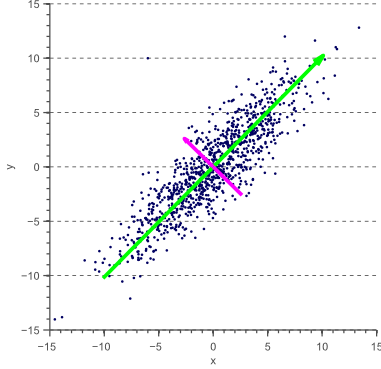

In [ ]:
pd.DataFrame(PCA(n_components=20).fit_transform(X_m))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5256.330308,2762.668453,116.434826,-104.916312,951.384943,1314.336228,341.534618,586.808754,554.923305,290.778490,-100.879901,-233.824361,-65.024070,325.872099,182.112565,-120.937376,-110.378085,-58.926283,17.896792,-26.484136
1,2364.543916,2732.140361,1361.771417,50.456200,2322.204786,-521.759343,249.414278,-545.744381,363.688171,161.741949,371.763214,26.273917,-285.189483,-63.362509,-79.546549,2.630945,-47.381121,30.830094,-32.858569,6.489516
2,-642.023929,-2361.729426,-517.764567,-674.877715,-457.040128,-215.846446,1579.291772,539.830736,-848.307149,-23.119405,-348.591881,518.572419,131.772946,327.766759,110.832940,88.736254,5.207238,4.683707,-46.520104,-3.600063
3,3658.988768,831.517182,1245.781725,-332.273284,2735.910305,-303.876683,-430.262990,164.262432,322.299116,-9.613945,-631.162796,-400.548204,376.380803,361.116876,70.689165,-39.802825,-47.088171,18.593812,-86.074309,-9.749355
4,-4278.240375,-401.452609,755.088030,-294.929252,351.192023,589.504179,307.074444,-520.610379,312.465436,-274.871553,-153.808769,181.983875,-230.937410,-6.862266,-129.268756,-3.980319,-232.371936,-31.980951,-42.292826,66.923790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-6969.644423,-872.249986,-1405.888261,298.861523,-50.744448,-160.693061,-1306.065742,826.045500,293.674962,519.374021,9.233849,-148.910037,-194.116948,-210.499314,-49.624644,-23.590356,11.151699,40.076043,-0.001855,37.956708
130,3439.133991,-2139.320373,2299.951852,670.230291,-1094.519051,-73.119398,-1158.207810,283.349260,-266.250071,-113.436851,-145.322043,-79.897776,-157.686907,-107.336954,-36.473851,-102.396340,6.048461,-102.208596,-122.237208,16.420359
131,-7321.940030,-522.665471,635.284803,-1136.235770,-230.594596,-316.625465,228.434475,82.494284,94.198914,-47.016577,-214.623350,357.894924,-393.066185,10.488698,-283.265049,49.834249,-41.345026,51.065380,35.681015,-42.630791
132,25681.285499,4372.473697,-3883.746118,-1510.447616,-3537.719469,-1025.847870,3541.496445,1295.573072,-633.896299,324.584407,195.805151,-89.988019,-391.428687,-100.475407,250.224049,240.360638,-29.235777,-80.741166,-274.466247,23.665317


In [ ]:
pd.DataFrame(KernelPCA(n_components=20, kernel='sigmoid').fit_transform(X_m))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-8.184878e+08,5.790952e+08,1.043241e+08,-3.714821e+08,6.386631e+07,6.348828e+08,1.764725e+08,3.122624e+06,2.405404e+07,4.699483e+07,3.491825e+07,-2.168617e+07,8.242919e+07,1.603506e+06,-3.594193e+07,3.917879e+07,1.277913e+08,-9.176439e+06,1.389814e+07,-7.995011e+07
1,-1.830821e+09,3.626650e+08,-3.614412e+08,-1.864529e+08,-2.894975e+08,3.567205e+08,2.590814e+06,-4.644387e+07,8.726645e+07,-5.614577e+07,5.390048e+07,1.623157e+08,7.765046e+07,-1.116019e+07,-6.074713e+07,-1.178635e+07,-1.298009e+07,-3.377827e+07,1.078277e+08,-1.814106e+07
2,-2.524322e+09,-1.021323e+08,-5.802563e+07,1.830344e+08,1.811696e+07,-9.453742e+07,-1.491484e+08,1.926722e+07,-5.907586e+07,4.083196e+07,-6.593114e+07,3.540071e+07,2.077588e+07,-8.428383e+07,1.344722e+07,-2.102499e+07,-6.733027e+07,-8.326705e+06,-8.263476e+07,-5.702705e+07
3,-1.464544e+09,1.560201e+08,-1.240876e+08,-2.573694e+08,-4.939748e+08,2.822978e+08,3.050366e+06,-7.450845e+07,1.081779e+08,-3.700826e+07,5.721890e+07,-6.369583e+07,-5.624828e+07,-9.197379e+07,1.860716e+06,6.021110e+07,1.799055e+07,-3.318679e+07,-9.750082e+06,-2.996144e+07
4,-2.927058e+09,1.284792e+07,-4.341641e+08,-1.414675e+06,1.694894e+07,-1.055836e+08,-1.222152e+08,2.418733e+06,4.729434e+07,1.210733e+07,-1.487059e+07,-1.978994e+07,-7.260081e+06,-2.305517e+07,-3.856703e+07,-1.868755e+07,-1.357059e+07,9.911999e+06,3.576131e+06,-6.921391e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-3.038235e+09,3.177895e+07,-4.928611e+08,2.762032e+07,1.812805e+07,-1.743968e+08,-1.388673e+08,1.777773e+07,-2.450642e+07,-2.041581e+07,1.347304e+07,-9.089634e+07,3.308932e+07,1.952498e+07,9.628733e+06,-5.981926e+05,4.466734e+06,1.827916e+07,-5.875969e+06,1.002381e+07
130,-1.510990e+09,-5.874306e+08,-2.181053e+08,4.469249e+07,2.656096e+07,3.189031e+07,1.289277e+08,-5.817827e+07,-1.120531e+08,3.933894e+07,-1.589175e+08,-1.535143e+07,-7.564329e+07,-1.200689e+08,-4.463032e+07,1.004446e+08,-7.683001e+07,-1.815619e+07,2.633276e+07,8.146979e+07
131,-3.050265e+09,3.173691e+07,-5.328023e+08,1.724964e+07,3.280609e+07,-1.789531e+08,-1.898385e+08,2.006327e+07,4.408255e+07,2.464994e+07,3.736429e+07,-4.479448e+07,-3.099825e+07,-2.379636e+07,-5.855535e+07,7.098565e+06,-5.862097e+06,2.091300e+07,-1.945988e+06,-4.882510e+06
132,2.374897e+10,6.961180e+09,5.063329e+09,3.491441e+09,5.589643e+09,1.150053e+09,-1.977301e+09,-3.767126e+08,3.450609e+08,-1.017316e+09,1.788171e+08,-2.794168e+07,8.846450e+07,6.267689e+06,-3.456142e+07,7.037266e+07,-1.011651e+08,1.260891e+06,-4.509449e+07,8.623003e+06


## Factor Analysis

> Factor Analysis reduces features into a smaller number of factors. These factors are created by grouping features that have a high corelation. Observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. 


Notable Hyperparameters
*   Number of features
*   Rotation
*   Random State

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis

Further background can be found at https://www.datacamp.com/community/tutorials/introduction-factor-analysis




In [ ]:
pd.DataFrame(FactorAnalysis(n_components=20).fit_transform(X_m))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.691965,0.604574,1.780358,0.783727,-0.063500,0.569870,-0.551868,0.994172,0.256788,-0.208873,0.458919,-0.677978,-0.045738,0.824769,-1.310934,-0.662936,0.939079,-0.208687,0.178993,-0.821335
1,0.366258,0.810139,-0.396617,0.680677,0.728787,1.761421,0.191645,0.075431,0.925667,0.443015,0.477956,-0.369616,-0.630367,0.037812,-0.304593,0.096512,-1.257828,0.254260,-0.377304,-0.033069
2,-0.203147,-0.088991,-0.706786,-0.816289,-0.853586,-0.136468,0.690724,1.327741,-1.381427,-0.829544,0.300188,1.565728,0.134659,1.293696,-0.051228,0.684194,0.853911,0.098972,-1.659419,0.176192
3,0.377001,0.160721,0.208491,0.068762,0.742337,2.033591,-1.025180,-0.056023,0.443070,-0.955083,-0.261841,-0.544784,1.673549,0.473485,-0.390751,-0.012624,1.784861,0.473228,-2.064368,0.855186
4,-0.493936,0.757327,0.258917,-0.193957,-0.074261,0.127388,0.132973,0.007104,0.649895,-0.491564,-0.626600,0.570940,-0.048072,0.250552,-2.070273,-0.143347,-1.201956,0.356136,-0.537327,1.493769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.756795,-1.504974,0.821827,0.099478,0.079112,-0.089399,-1.158339,-0.370528,-0.197538,0.114159,0.900653,-0.650337,-0.258295,-0.828740,0.320027,-0.124475,-0.720421,0.281804,-0.971141,-0.181687
130,0.207254,-0.036795,-0.058480,-0.909115,1.302017,-1.023142,-0.974390,-0.651318,-0.591948,-0.299740,-0.315389,-0.380508,-0.136586,-0.107859,-0.083434,-0.090168,-0.544472,-0.781841,-0.753020,-0.080121
131,-0.786876,0.115106,-0.544821,-0.064291,-0.237499,-0.129337,-0.540698,0.390202,0.106771,-0.624666,0.083038,0.839844,0.176316,0.687664,-0.204668,-0.058065,-2.061621,0.401096,-1.693163,0.358876
132,3.096354,-1.387695,-1.269191,1.506216,-2.403878,-1.872455,1.400453,3.934232,-1.322808,-0.094492,0.336271,-0.864911,-1.609324,0.226530,-0.534525,2.559549,-0.169522,-0.097550,-0.658860,0.074852


## Random Projections


> Random Projections reduces features by taking the product of a data matrix D and a random matrix R.  Given n by p matrix D and p by k matrix R, the product DR is an n by k matrix where ideally k < p. 

Notable Algorithms
1.   GaussianRandomProjection
2.   SparseRandomProjection

Notable Hyperparameters
*   Number of features
*   Random State

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html#sklearn.random_projection.GaussianRandomProjection and https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.SparseRandomProjection.html#sklearn.random_projection.SparseRandomProjection


Further background can be found at https://machinelearningmedium.com/2017/07/28/random-projection-in-dimensionality-reduction/


> Johnson - Lindenstrauss Lemma


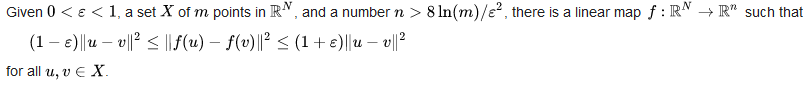

In [ ]:
print(f'Minimum Dimension for epsilon = 0.1: {johnson_lindenstrauss_min_dim(134, eps=0.1)}')
pd.DataFrame(GaussianRandomProjection(n_components=20).fit_transform(X_m))

Minimum Dimension for epsilon = 0.1: 4198


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1939.464757,-1442.539970,2974.232089,2778.150855,-328.532336,2184.921204,75.909840,-7122.088779,3349.219947,9391.967203,3969.257829,480.104052,3258.832314,-2830.063955,774.282065,-4000.620639,-9036.990599,4566.109582,-3118.377156,-6139.640052
1,-1738.668923,-757.348367,2672.055591,2597.288763,-770.565348,938.149999,395.979085,-6450.139123,2135.669492,7390.381818,3477.256186,-814.440320,1432.020717,-2815.262010,589.709015,-2815.178371,-6790.826148,3535.509634,-3539.989376,-4263.561621
2,357.928538,-1345.468276,4092.779793,1373.871062,3424.157857,2245.074206,355.435065,-3743.820012,4044.275827,7222.670723,2295.405729,1277.135643,3389.302706,-1958.196313,563.255430,-913.353956,-6254.230764,-137.281862,-1004.900206,-4901.700844
3,-723.107687,-711.967905,3662.349280,1822.287754,1089.444560,-107.982258,596.430964,-6433.940067,2737.775390,8505.919364,4671.781489,-15.823864,2141.830960,-3355.765710,972.816060,-2723.370762,-8235.138117,2833.244792,-3275.060019,-5633.295221
4,245.360611,-558.867026,2923.666345,1125.686599,1299.895077,971.818014,119.090799,-3529.251273,2081.194073,3980.624287,907.883133,671.678700,2449.326288,-766.921795,986.097934,-777.150764,-3730.077998,782.849498,-1964.174744,-3066.324290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1234.946153,-628.708821,2975.130803,1244.746794,2868.208532,392.212102,385.008983,-2327.578202,1987.468578,3355.580647,1672.268089,967.436972,2750.960859,572.389338,1742.389745,-159.849095,-1388.981057,-269.191186,-710.315206,-2305.922419
130,72.111691,-2893.616834,4872.299656,980.995823,3121.407036,689.046438,-700.917063,-7201.766382,2177.759527,7596.796953,2703.971687,37.259307,2660.242338,-2325.516256,2081.657646,-1054.012219,-8495.413164,1395.427712,-1894.150110,-8163.340342
131,630.027807,-428.355632,2095.162910,1077.474931,1477.930145,1070.127639,221.733947,-1941.447978,1706.628655,2430.405889,558.094983,546.805583,1795.432509,-143.112072,639.769697,-87.237598,-1870.299581,-247.988937,-920.606636,-1669.865528
132,-5510.491409,-4771.355421,2187.530479,7304.829548,1376.409694,9138.458156,-1745.867237,-13551.889751,5601.380500,22195.145954,8038.303294,465.852516,5643.026886,-8178.757588,-518.938811,-7679.880010,-21290.769182,8013.746265,-3778.935998,-15808.922201


In [ ]:
pd.DataFrame(SparseRandomProjection(n_components=20).fit_transform(X_m))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7450.663676,-487.310097,-2558.346864,4950.268002,7461.603005,-922.617507,4555.883802,-1496.624701,-1336.264269,-2885.483392,817.163938,161.084530,442.548389,-754.821446,-7461.844371,445.468139,-1026.879818,-4002.236995,6.127581,-2523.052931
1,6022.750415,-331.582333,-1550.192373,2268.139328,6018.966420,-274.145020,4894.582538,-898.138327,-857.674491,-1999.436722,-528.607035,43.079932,585.873056,-935.900421,-6058.612726,611.130837,-350.946113,-3606.521388,4.134365,-2718.473716
2,3564.796221,-457.637655,-918.405282,4703.677632,3561.121229,-576.825726,3421.331406,-4.422447,-3254.578668,-2209.464041,2593.360501,183.554923,-659.045874,115.949095,-3579.877700,168.084143,-1228.467114,-3690.197518,1.837496,-2450.386204
3,6099.201138,-601.468412,-1781.288605,3379.232510,6088.261809,-578.717723,5930.587546,-767.738418,-1740.887057,-2620.595925,386.076540,186.832829,-0.794172,-582.898805,-6095.642936,778.483096,-1730.983267,-3478.371633,-0.023358,-2090.353830
4,2283.111804,-484.429277,-1445.556335,3233.961343,2300.793807,-421.549550,2270.210404,-560.140330,-1181.517541,-2243.940444,-64.211133,94.000364,-384.005464,-678.869027,-2310.526306,288.759340,-980.771133,-3701.993306,5.800569,-2508.010381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1172.345635,-309.579101,-507.141036,3841.097962,1150.607126,-1633.463631,1071.696027,-21.170131,-444.339169,-3909.762686,-552.439977,115.777803,-662.705293,182.301377,-1164.645282,-1241.111576,-1046.165737,-3769.762641,2.616096,-2122.027274
130,5355.287877,-461.156927,-1413.174365,7472.916061,5392.645099,-620.427319,5267.158156,-542.255891,-805.578372,-2711.006943,-258.845532,109.837086,-586.480364,-614.198520,-5379.354399,198.363893,-1503.445236,-3686.475811,0.840888,-1639.801434
131,1026.988822,-225.077655,-488.454639,2323.248628,1023.594126,-669.370108,1018.175071,-23.856301,-860.851178,-1814.410245,220.265908,32.335253,-651.213159,-112.967057,-1038.574388,-468.140968,-352.884826,-2510.945703,5.099829,-2005.447513
132,17919.787819,-551.490085,-2193.853113,9142.156357,17902.409469,-577.246170,7577.302948,-1002.961229,-6938.921115,-2624.006192,6179.973090,177.692066,407.254456,-83.769562,-17913.286510,274.939192,-111.869232,-4310.881775,0.311440,-3735.068230


## Linear Discriminant Analysis (LDA)

> Linear Discriminant Analysis projects data in a way that the class seperablility is maximized. This algorithm will only project down to dimensions lower than or equal to the number of classes.


Notable Hyperparameters
*   Number of components (must be <= # of classes)

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

Further background can be found at https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/

Videos: https://www.youtube.com/watch?v=azXCzI57Yfc

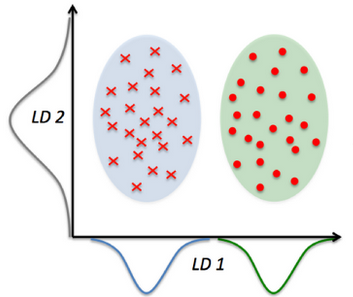

In [ ]:
pd.DataFrame(LinearDiscriminantAnalysis().fit_transform(X_m, y_m))

,0,1,2,3,4,5,6,7
0,8.450152,-12.198751,-6.010490,-10.077365,-10.190341,6.480076,6.382872,0.084364
1,-13.946338,8.015291,-21.869789,11.566625,-3.746372,4.344280,-0.424196,-4.250829
2,4.591411,-7.427585,9.796671,-0.379338,-6.953244,-1.331422,-3.935855,1.835720
3,7.491849,-11.794911,-6.048346,-9.299492,-8.542283,3.164820,6.938821,0.589369
4,-8.264198,-0.611146,7.893228,16.203121,1.000718,-1.045852,6.642718,3.705188
...,...,...,...,...,...,...,...,...
129,-4.008403,5.844394,-10.920765,-0.112122,-0.318458,-6.894721,1.100284,-0.498834
130,8.161231,-15.698534,4.722686,1.773496,4.531455,1.048058,3.175449,-3.330429
131,-14.417900,12.853739,-20.504236,11.320463,-2.888099,5.652423,-0.247862,-2.352093
132,7.243451,-5.515496,10.057164,1.598839,-5.894622,-0.854035,-5.592486,0.264355


# Manifold Learning for Dimensionality Reduction

## Multi-dimensional Scaling (MDS)

> Multidimensional Scaling projects data to a lower dimension such that data points that are close to each other (in terms of Euclidean distance) in the higher dimension are close to each other in the lower dimension as well. 

Notable Hyperparameters
*   Number of components 
*   Metric (Classic/Metric vs Nonmetric)

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

Further background can be found at https://www.statisticshowto.com/multidimensional-scaling/

Videos: https://www.youtube.com/watch?v=GEn-_dAyYME

In [ ]:
pd.DataFrame(MDS().fit_transform(X_m, y_m))

,0,1
0,-5762.125474,-1932.860997
1,-3837.706154,259.155315
2,2453.836304,-1663.312590
3,-3632.784695,-1971.367057
4,3087.968593,2845.119562
...,...,...
129,3729.222194,6421.057889
130,-655.360886,-4502.465609
131,5616.320509,4867.706703
132,-22540.220477,-14926.223665


## Isometric Feature Mapping (Isomapping)

> Isometric Feature Mapping projects data to a lower mapping while preserving geodesic distance. Geodesic distance is the shortest distance between points on a curve. 

Notable Hyperparameters
*   Number of components 
*   Number of neighbors
*   the p value for the Lp-norm/Minkowski metric

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap

Further background can be found at https://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/ and https://medium.com/data-science-in-your-pocket/dimension-reduction-using-isomap-72ead0411dec

In [ ]:
pd.DataFrame(Isomap(n_neighbors= 6, n_components=20, p = 3).fit_transform(X_m, y_m))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5981.076949,-4817.717309,917.657847,-2357.819282,-1188.824896,1994.247005,1023.528449,-57.935618,819.116530,-371.691968,271.046059,999.163568,988.522951,-1186.116026,269.808101,-10.117054,-878.214419,1501.491579,-1243.108935,-198.749119
1,3040.430021,-4403.846941,1178.673913,-1498.797103,-2950.280129,642.917800,1824.554335,50.886898,523.600980,-188.086005,1678.844036,2063.128220,519.586431,-564.427653,-258.085628,-492.482905,339.623074,1197.037642,-713.132333,-407.122000
2,-360.623372,2500.320662,1888.195242,-1800.587824,529.748459,1840.182789,101.267096,-1640.338682,-356.624498,291.705901,-558.456717,-619.237155,-925.678537,852.631785,-1296.139684,1124.893108,760.243721,1574.947546,-50.756138,-1275.164897
3,3723.815443,-2488.154422,1165.361009,-1565.201541,-3034.354061,-1031.665245,178.519505,-1327.393303,-2111.263111,-899.109087,631.952614,1784.548327,406.471785,-1038.957567,1074.086668,-223.715499,244.724927,435.385506,158.440792,66.542158
4,-3739.445928,-154.641706,843.894536,1220.617377,-861.924271,-292.303735,-1044.623504,445.889849,-315.121497,84.887495,-1010.481530,-88.787257,-341.671350,-678.492263,30.707701,-49.633597,379.767982,-490.511789,-409.802305,474.985313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-6688.135252,2708.118251,-1442.926382,765.180556,1343.853010,476.437328,2002.993410,-135.830642,-312.453412,-294.388275,548.986795,-187.122078,-491.660155,382.626504,-844.786143,248.041578,341.426761,-705.778890,360.261782,460.342316
130,2551.761237,2400.860257,2605.944433,-2853.035799,80.382733,368.625755,-311.361852,722.770885,-482.274248,-397.231798,154.477587,-908.715978,1210.638356,-230.458401,754.272240,-175.959955,-1306.311958,120.637129,126.952616,1592.701009
131,-6786.040801,1068.616898,-128.900526,943.270563,-647.377872,-158.959744,24.437433,-546.944362,346.691074,2.633589,-136.348316,-535.965050,255.896727,771.705714,160.042590,-200.937955,-673.747664,-749.383468,246.206924,-129.683068
132,26569.039470,-4015.055286,-3232.504125,3866.804328,-2403.891142,-1444.517102,-2707.643943,2534.372181,3590.454975,-1672.060772,-367.251749,1605.610403,-481.341732,-110.150050,1225.985215,912.602017,1425.003575,-275.133142,60.179909,-755.458288


## Local Linear Embeddings (LLE) and Hessian Eigenmapping (HLLE)

> Local Linear Embeddings (LLE) projects data to a lower dimension while preserving the local neighborhood. If the Hessian operator is applied to this algorithm, it is called Hessian Eigenmapping (HLLE). 


Notable Hyperparameters
*   Number of components 
*   Number of neighbors
*   Method (set to Hessian for HLLE)
*   Random state

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding

Further background can be found at http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf and http://cseweb.ucsd.edu/~elkan/254spring05/Ettinger419.pdf and https://manifoldlearningjl.readthedocs.io/en/latest/hlle.html

In [ ]:
pd.DataFrame(LocallyLinearEmbedding(n_neighbors=6, n_components=20).fit_transform(X_m, y_m))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.038622,-0.023092,0.015085,0.043554,-0.106212,-0.125224,0.005196,-0.077053,0.020386,0.002794,-0.029489,0.008445,0.038627,0.078754,-0.053804,0.019584,0.017560,0.059125,0.069294,-0.073727
1,0.052635,-0.000216,0.050669,0.029396,-0.098754,-0.118319,-0.008167,-0.067112,-0.014565,0.001770,-0.059467,0.105739,0.049144,0.103341,-0.141859,0.060630,-0.055915,-0.087645,-0.036617,0.064090
2,-0.039853,-0.125889,-0.076749,-0.089559,-0.036607,0.018584,0.005123,0.037953,0.025989,-0.111864,0.102144,-0.012479,-0.052023,-0.111851,-0.194423,0.056270,-0.025365,0.062669,0.017850,-0.004881
3,0.034759,-0.018526,0.031758,0.032245,-0.128356,-0.142989,0.015084,-0.085692,0.019542,0.010102,-0.053937,0.041994,0.073324,0.168042,-0.128744,0.054780,-0.027352,-0.004176,-0.020695,-0.023581
4,-0.025118,0.027756,0.003768,-0.019534,-0.053192,0.032136,0.130837,0.115483,-0.041523,-0.090254,-0.049562,0.052992,-0.007125,0.018450,0.133551,-0.087561,0.053841,0.043552,-0.140043,-0.054554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.040521,0.049428,-0.005348,-0.056358,0.026782,0.047889,-0.085769,-0.021510,0.063545,0.081000,-0.093703,-0.010798,-0.095248,0.020138,-0.036248,0.125502,0.295435,0.109962,-0.119812,0.049727
130,-0.013886,-0.035574,-0.016304,-0.001344,-0.098085,-0.064338,0.062738,-0.013151,0.045718,-0.018536,0.031035,-0.120098,-0.051203,-0.049857,0.049255,-0.013269,-0.029548,-0.074251,-0.075566,0.125431
131,-0.036552,0.093209,0.017581,-0.025994,0.003989,0.056878,-0.015159,-0.010692,0.024200,0.018079,-0.077679,-0.021880,-0.049201,-0.006468,-0.016895,-0.062239,-0.069142,-0.047467,0.057708,-0.034793
132,0.144331,0.011224,0.040425,0.165069,0.104012,-0.034976,-0.294207,0.230683,0.078037,-0.317020,-0.033385,-0.202688,0.023810,0.144217,0.009136,0.006947,-0.002596,0.009327,0.007583,0.049617


In [ ]:
pd.DataFrame(LocallyLinearEmbedding(n_neighbors=8, n_components=2, method='hessian').fit_transform(X_m, y_m))
#NOTE: HLLE can only be applied if n_neighbors > n_components * (1 + (n_components + 1) / 2

,0,1
0,0.004931,-0.033272
1,0.004931,-0.017045
2,0.004931,0.004186
3,0.004931,-0.020551
4,0.004931,0.038766
...,...,...
129,0.004931,0.056012
130,0.004931,-0.017334
131,0.004931,0.054646
132,0.004931,-0.216315


## Spectral Embeddings (Laplacian Eigenmaps)

> Spectral Embeddings map nearby inputs to nearby outputs when projecting down to a lower dimension.   


Notable Hyperparameters
*   Number of components 
*   Affinity (can be nearest neighbors or rbf kernel)
*   Random state

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html#sklearn.manifold.SpectralEmbedding

Further background can be found at http://danshiebler.com/2020-05-09-pca-laplacian/

In [ ]:
pd.DataFrame(SpectralEmbedding(n_components=20, n_neighbors=6).fit_transform(X_m, y_m))
#NOTE: Nearest neighbors is the default

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.034825,-0.025407,-0.060675,-0.027069,-0.003307,-0.004596,0.027609,-0.014713,-0.024769,-0.052565,-0.026549,0.018968,0.066940,-0.035386,0.003127,0.045483,0.018492,0.016012,-0.024622,0.017278
1,0.026402,-0.040097,-0.053268,-0.018874,-0.001417,-0.019124,-0.014534,-0.010611,0.018930,0.015341,0.015071,0.058929,0.121513,0.037116,0.002201,-0.022774,-0.015362,-0.015380,0.018187,0.005882
2,0.011005,-0.042447,0.042595,0.063528,-0.013398,0.019297,0.040200,-0.028369,-0.011936,0.000901,-0.050561,0.039521,-0.036064,0.041282,0.001041,-0.046921,0.007300,0.044011,-0.086111,0.030819
3,0.030304,-0.037962,-0.055788,-0.007580,-0.013906,-0.019704,-0.026880,-0.022114,0.000804,-0.009508,-0.005895,0.048510,0.117274,0.019737,0.003889,0.003897,-0.007713,-0.013600,0.005530,0.022971
4,-0.011213,-0.034993,0.053762,-0.016274,0.040694,-0.030672,-0.009984,-0.002250,0.013060,0.004574,-0.023346,0.001579,-0.004651,-0.044252,0.007863,0.055422,-0.025464,-0.002363,0.089239,0.028782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.040419,0.014357,0.009746,-0.026411,-0.061830,0.063003,0.010506,-0.085179,0.116648,-0.033930,0.012507,-0.052688,0.016313,-0.004447,-0.019095,0.002091,0.073903,-0.050139,0.026208,0.008303
130,0.031494,-0.036118,-0.029249,0.046738,-0.043368,-0.005422,-0.073424,-0.011651,-0.014709,-0.001932,-0.009463,-0.056110,-0.107659,0.023109,-0.003374,-0.002387,-0.005585,0.005128,0.032251,0.038953
131,-0.041560,0.014401,0.011807,-0.034316,-0.049175,0.009285,-0.013714,0.007860,-0.032675,-0.020605,0.044687,0.065173,-0.025784,-0.004489,0.008405,-0.000713,-0.021954,0.020429,0.007322,-0.018227
132,0.065853,0.082651,0.029539,-0.018965,0.017454,-0.015695,0.006238,-0.078225,-0.037304,0.052145,0.027457,-0.007164,-0.005222,0.056697,-0.002890,0.049408,0.009225,0.012342,0.005096,-0.001057


## t-distributed Stochatic Neighbor Embeddings (t-SNE)

> t-distributed Stochatic Neighbor Embeddings (t-SNE) computes the probability that pairs of data points in the high-dimensional space are related then chooses a low-dimensional embedding which produces a similar distribution. This algorithm attempts preserve the clustering of points from different classes. 


Notable Hyperparameters
*   Number of components (must be <= 3)
*   Random state

Documentation is found at https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

Further background can be found at https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

Videos: https://www.youtube.com/watch?v=NEaUSP4YerM

In [ ]:
pd.DataFrame(TSNE(n_components=3).fit_transform(X_m, y_m))

,0,1,2
0,-10.620711,-35.136986,-126.922188
1,31.705462,-184.362793,12.249160
2,-127.756981,-3.553549,39.073631
3,-18.834454,24.406656,-136.405655
4,-23.803316,-6.533641,71.071075
...,...,...,...
129,-161.208588,-52.119946,-96.790085
130,-38.412704,41.186520,-68.451958
131,64.194901,-16.921499,-72.858818
132,-78.555794,35.971691,-176.138016


# Miscellaneous Methods for Dimensionality Reduction

## Autoencoders

> Autoencoder apply neurual networks to "encode" data down to a latent space then applies another neural network to create a decoder the will "decode" the data in the latent space back to its original space.  

Autoencoders can be coded through TensorFlow. A tutorial and further background can be found at https://www.tensorflow.org/tutorials/generative/autoencoder

Videos: https://www.youtube.com/watch?v=rZufA635dq4&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=11

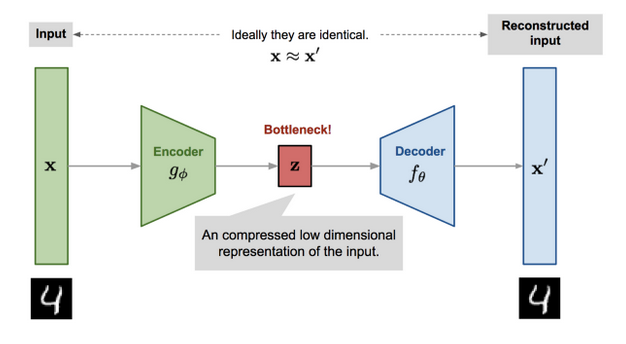

## References
- Johnson, B., Xie, Z., 2013. Classifying a high resolution image of an urban area using super-object information. ISPRS Journal of Photogrammetry and Remote Sensing, 83, 40-49.

- Johnson, B., 2013. High resolution urban land cover classification using a competitive multi-scale object-based approach. Remote Sensing Letters, 4 (2), 131-140.

- Raj, Judy. (2019, March 11). *A beginner's guide to Dimensionality Reduction* Towards Data Science. https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e
